In [1]:
##########################################################################
# Created on Sat Nov 13 14:11:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 11.2.2.Call option payoff

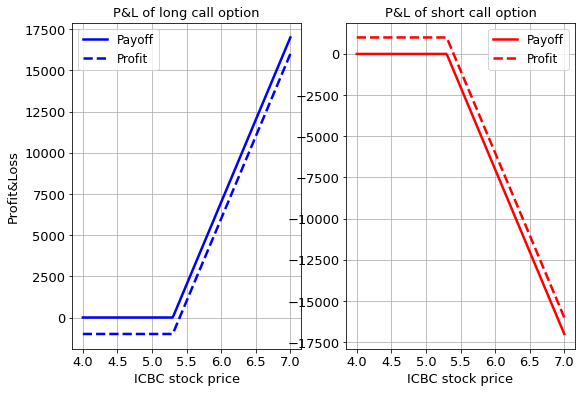

In [3]:
import numpy as np
import matplotlib.pyplot as plt

S=np.linspace(4,7,200)
K_call=5.3
C=0.1
N=10000

profit1_call=N*np.maximum(S-K_call,0) #Payoff
profit2_call=N*np.maximum(S-K_call-C,-C) #Profit

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.plot(S,profit1_call,'b-',label='Payoff',lw=2.5)
plt.plot(S,profit2_call,'b--',label='Profit',lw=2.5)
plt.xlabel('ICBC stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Profit&Loss',fontsize=13)
plt.yticks(fontsize=13)
plt.title('P&L of long call option',fontsize=13)
plt.legend(fontsize=12)
plt.grid()

plt.subplot(1,2,2)
plt.plot(S,-profit1_call,'r-',label='Payoff',lw=2.5)
plt.plot(S,-profit2_call,'r--',label='Profit',lw=2.5)
plt.xlabel('ICBC stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('P&L of short call option',fontsize=13)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# 11.2.3.Put option payoff

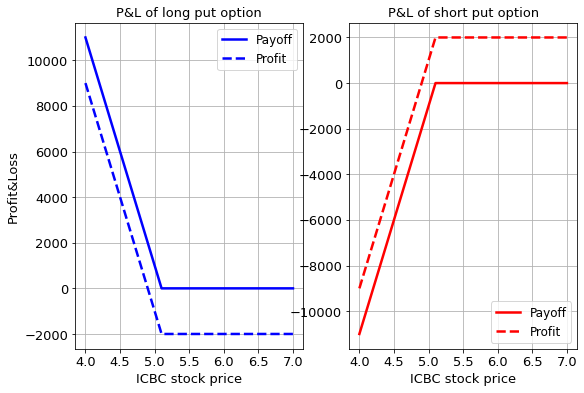

In [4]:
K_put=5.1
P=0.2

profit1_put=N*np.maximum(K_put-S,0) #Payoff
profit2_put=N*np.maximum(K_put-S-P,-P) #Profit

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.plot(S,profit1_put,'b-',label='Payoff',lw=2.5)
plt.plot(S,profit2_put,'b--',label='Profit',lw=2.5)
plt.xlabel('ICBC stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Profit&Loss',fontsize=13)
plt.yticks(fontsize=13)
plt.title('P&L of long put option',fontsize=13)
plt.legend(fontsize=12)
plt.grid()

plt.subplot(1,2,2)
plt.plot(S,-profit1_put,'r-',label='Payoff',lw=2.5)
plt.plot(S,-profit2_put,'r--',label='Profit',lw=2.5)
plt.xlabel('ICBC stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('P&L of short put option',fontsize=13)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# 11.2.4.Put-Call parity

$$c+Ke^{-rT}=p+S_0\tag{11-1}$$
where,\
c:price of call option\
p:price of put option\
S_0:underlying price\
K:strike of option\
r:risk free rate(continuous compound)\
T:expiration

$$c=p+S_0-Ke^{-rT}\tag{11-2}$$
$$p=c+Ke^{-rT}-S_0\tag{11-3}$$

In [6]:
def option_parity(opt,c,p,S,K,r,T):
    '''Define a function to calculate option price using put-call parity.
    opt:option type. 'call'indicates call option, otherwise put option
    c:price of call option. If is calculate target, 'Na'
    p:price of put option. If is calculate target, 'Na'
    S:underlying stock price
    K:strike price
    r:risk free rate(continuous compound)
    T:expiration tenor in year'''
    from numpy import exp
    if opt=='call':
        value=p+S-K*exp(-r*T)
    else:
        value=c+K*exp(-r*T)-S
    return value

In [7]:
price_call=0.15
price_put=0.3
S_ICBC=5.0
K_ICBC=5.2
shibor=0.02601
tenor=3/12

value_call=option_parity(opt='call',c='Na',p=price_put,S=S_ICBC,K=K_ICBC,r=shibor,T=tenor)
value_put=option_parity(opt='put',c=price_call,p='Na',S=S_ICBC,K=K_ICBC,r=shibor,T=tenor)

print('price of European call option using put-call parity is ',round(value_call,4))
print('price of European put option using put-call parity is ',round(value_put,4))

price of European call option using put-call parity is  0.1337
price of European put option using put-call parity is  0.3163
